In [1]:
from nn_core import *
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2

In [2]:
labels = os.listdir('fashion_data/train')

# Loads a MNIST dataset
def load_mnist_dataset(dataset, path):
    # Scan all the directories and create a list of labels
    labels = os.listdir(os.path.join(path, dataset))

    # Create lists for samples and labels
    X = []
    y = []

    # For each label folder
    for label in labels:
    # And for each image in given folder
        for file in os.listdir(os.path.join(path, dataset, label)):
        # Read the image
            image = cv2.imread(
            os.path.join(path, dataset, label, file),
            cv2.IMREAD_UNCHANGED)
        # And append it and a label to the lists
            X.append(image)
            y.append(label)
            
    # Convert the data to proper numpy arrays and return
    return np.array(X), np.array(y).astype('uint8')


In [3]:
# MNIST dataset (train + test)
def create_data_mnist(path):
    # Load both sets separately
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)
    
    # And return all the data
    return X, y, X_test, y_test

In [4]:
# Create dataset
X, y, X_test, y_test = create_data_mnist('fashion_data')

# Shuffle the training dataset
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

# Scale and reshape samples
X = (X.reshape(X.shape[0], -1).astype(np.float32) - 127.5) / 127.5
X_test = (X_test.reshape(X_test.shape[0], -1).astype(np.float32) -
127.5) / 127.5

# Instantiate the model
model = Model()

In [5]:
# 118k parameters
model.add(DenseLayer(X.shape[1], 128))
model.add(ReLU())
model.add(DenseLayer(128, 128))
model.add(ReLU())
model.add(DenseLayer(128, 10))
model.add(SoftMax())
# Set loss, optimizer and accuracy objects
model.set(
    loss=CategoricalCrossEntropyLoss(),
    optimizer=Adam(decay=1e-4),
    accuracy=Categorical()
)
# Finalize the model
model.finalize()
# Train the model
model.train(X, y, validation_data=(X_test, y_test),
epochs=20, batch_size=128, print_every=100)

epoch: 1
step: 0, acc: 0.102, loss: 2.302 (data_loss: 2.302, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.750, loss: 0.657 (data_loss: 0.657, reg_loss: 0.000), lr: 0.0009900990099009901
step: 200, acc: 0.805, loss: 0.521 (data_loss: 0.521, reg_loss: 0.000), lr: 0.000980392156862745
step: 300, acc: 0.836, loss: 0.488 (data_loss: 0.488, reg_loss: 0.000), lr: 0.0009708737864077671
step: 400, acc: 0.844, loss: 0.409 (data_loss: 0.409, reg_loss: 0.000), lr: 0.0009615384615384615
step: 468, acc: 0.781, loss: 0.658 (data_loss: 0.658, reg_loss: 0.000), lr: 0.0009552923194497518

training : acc: 0.764, loss: 0.643 (data_loss: 0.643, reg_loss: 0.000), lr: 0.0009552923194497518
validation : acc: 0.823, loss: 0.485

epoch: 2
step: 0, acc: 0.812, loss: 0.544 (data_loss: 0.544, reg_loss: 0.000), lr: 0.0009552010698251983
step: 100, acc: 0.867, loss: 0.440 (data_loss: 0.440, reg_loss: 0.000), lr: 0.0009461633077869241
step: 200, acc: 0.820, loss: 0.411 (data_loss: 0.411, reg_loss: 0.000), lr: 0.0009

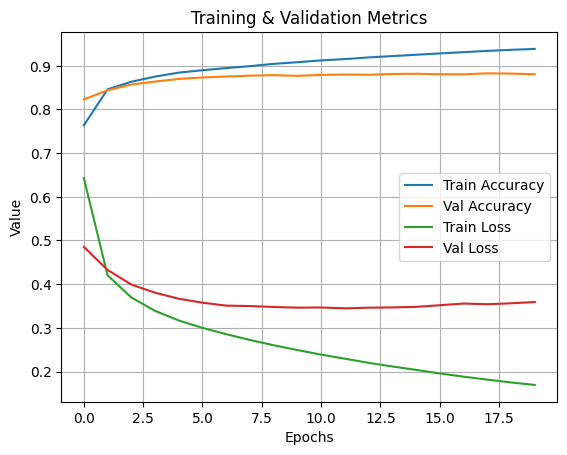

In [6]:
# Accuracy
plt.plot(model.history['train_acc'], label='Train Accuracy')
plt.plot(model.history['val_acc'], label='Val Accuracy')

# Loss
plt.plot(model.history['train_loss'], label='Train Loss')
plt.plot(model.history['val_loss'], label='Val Loss')

plt.xlabel("Epochs")
plt.ylabel("Value")
plt.title("Training & Validation Metrics")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
def get_predictions(model, X):
    # get the predictions and return it 
    output = model.forward(X, training=False)
    predictions = model.output_layer_activation.predictions(output)
    return predictions

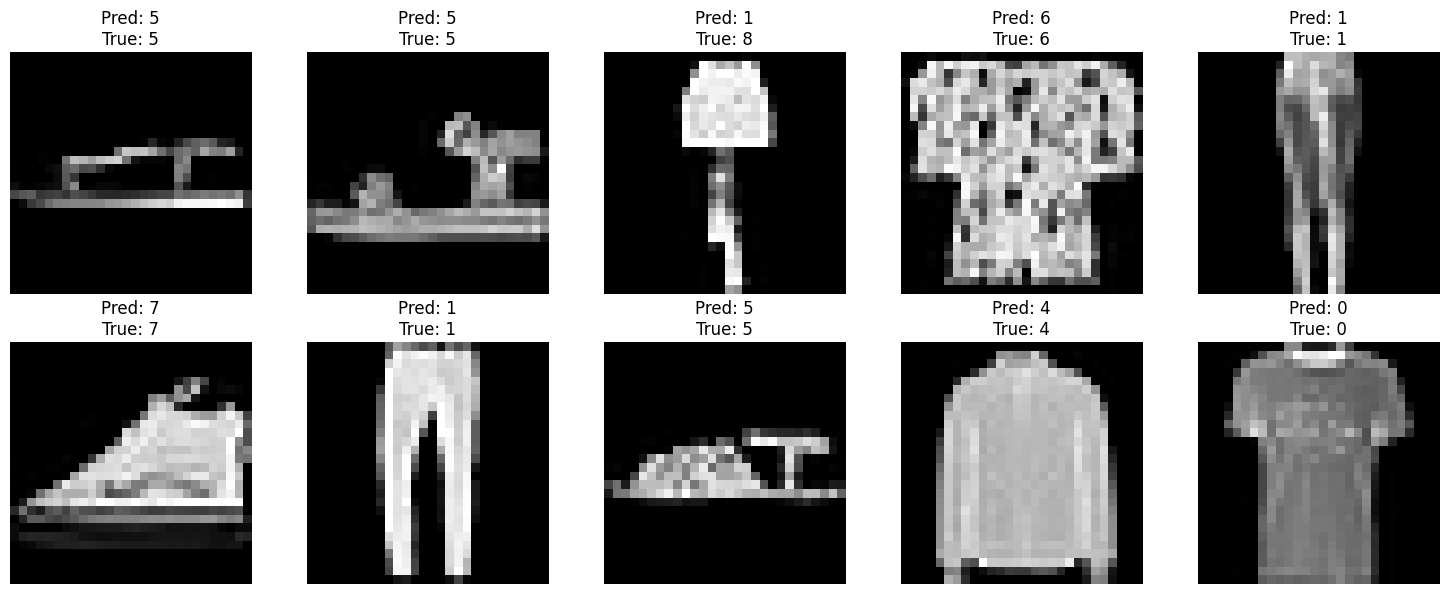

In [9]:
# Get the label names from the folder names
label_names = sorted(os.listdir('fashion_data/train'))

# Pick 10 random samples from the test set
indices = np.random.choice(len(X_test), 10, replace=False)
images = X_test[indices]
true_labels = y_test[indices]

# Get predictions for these samples
pred_labels = get_predictions(model, images)

# Plot the images
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    
    # Reshape image back to 28x28
    img = images[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    
    plt.title(
        f"Pred: {label_names[pred_labels[i]]}\nTrue: {label_names[true_labels[i]]}",
        fontsize=12
    )
    plt.axis('off')

plt.tight_layout()
plt.show()
